 # Project 7: Explanatory Data Analysis & Advanced Visualization (Baby Names Dataset)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 7 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## First Inspection: The most popular Names in 2018

In [1]:
import pandas as pd

1. __Load__ and __inspect__ the dataset "us_baby_names.csv". __Save__ the DataFrame in __df__.

In [2]:
df  = pd.read_csv('us_baby_names.csv')

In [3]:
df.head(3)

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Year    int64 
 1   Name    object
 2   Gender  object
 3   Count   int64 
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


2. Find the most popular __Baby Girl Names__ in __2018__. 

In [5]:
df[(df.Year == 2018) & (df.Gender == 'F')].nlargest(10, 'Count')

,Year,Name,Gender,Count
1925013,2018,Emma,F,18688
1925014,2018,Olivia,F,17921
1925015,2018,Ava,F,14924
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1925018,2018,Charlotte,F,12940
1925019,2018,Mia,F,12642
1925020,2018,Amelia,F,12301
1925021,2018,Harper,F,10582
1925022,2018,Evelyn,F,10376


3. Find the most popular __Baby Boy Names__ in __2018__.

In [6]:
df[(df.Year == 2018) & (df.Gender == 'M')].nlargest(10, 'Count')

,Year,Name,Gender,Count
1943042,2018,Liam,M,19837
1943043,2018,Noah,M,18267
1943044,2018,William,M,14516
1943045,2018,James,M,13525
1943046,2018,Oliver,M,13389
1943047,2018,Benjamin,M,13381
1943048,2018,Elijah,M,12886
1943049,2018,Lucas,M,12585
1943050,2018,Mason,M,12435
1943051,2018,Logan,M,12352


4. __Create__ the function __most_pop(year, gender, n)__ that returns the __n__ most popular __M/F__ Names in the __year XYZ__.

In [7]:
def most_pop(year, gender, n):
    return df[(df.Year == year) & (df.Gender == gender)].nlargest(n, 'Count')

## Evergreen Names (1880 - 2018)

5. Find those __Evergreen Boy Names__ that are in __1880 and 2018__ among the most popular Boy Names (__Top 20__).

In [8]:
m_1880 = most_pop(1880, 'M', 20)

In [9]:
m_2018 = most_pop(2018, 'M', 20)

In [10]:
m_evergreen = m_2018[['Name', 'Count']].merge(m_1880[['Name', 'Count']], how = 'inner', on = 'Name', suffixes = ('_2018','_1880'))

In [11]:
m_evergreen

,Name,Count_2018,Count_1880
0,William,14516,9532
1,James,13525,5927
2,Henry,10649,2444


6. Find those __Evergreen Girl Names__ that are in __1880 and 2018__ among the most popular Girl Names (__Top 20__).

In [12]:
f_1880 = most_pop(1880, 'F', 20)

In [13]:
f_2018 = most_pop(1880, 'F', 20)

In [14]:
f_evergreen = f_2018[['Name','Count']].merge(f_1880[['Name', 'Count']], how ='inner', on='Name', suffixes = ('_2018', '_1880'))

In [15]:
f_evergreen

,Name,Count_2018,Count_1880
0,Mary,7065,7065
1,Anna,2604,2604
2,Emma,2003,2003
3,Elizabeth,1939,1939
4,Minnie,1746,1746
5,Margaret,1578,1578
6,Ida,1472,1472
7,Alice,1414,1414
8,Bertha,1320,1320
9,Sarah,1288,1288


## Advanced Data Aggregation

7. Create the following __aggregated DataFrame agg__ (you can see the first and last 5 rows):

In [16]:
agg = df.groupby(['Name', 'Gender']).agg(Total = ('Count','sum'), No_Year = ('Count', 'count'), First_Year = ('Year', 'min'), Last_Year = ('Year', 'max'), Max_Count = ('Count', 'max'))

In [17]:
agg

,,Total,No_Year,First_Year,Last_Year,Max_Count
Name,Gender,,,,,
Aaban,M,114,11,2007,2018,16
Aabha,F,35,5,2011,2016,9
Aabid,M,16,3,2003,2018,6
Aabidah,F,5,1,2018,2018,5
Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5
Zyvon,M,7,1,2015,2015,7
Zyyanna,F,6,1,2010,2010,6


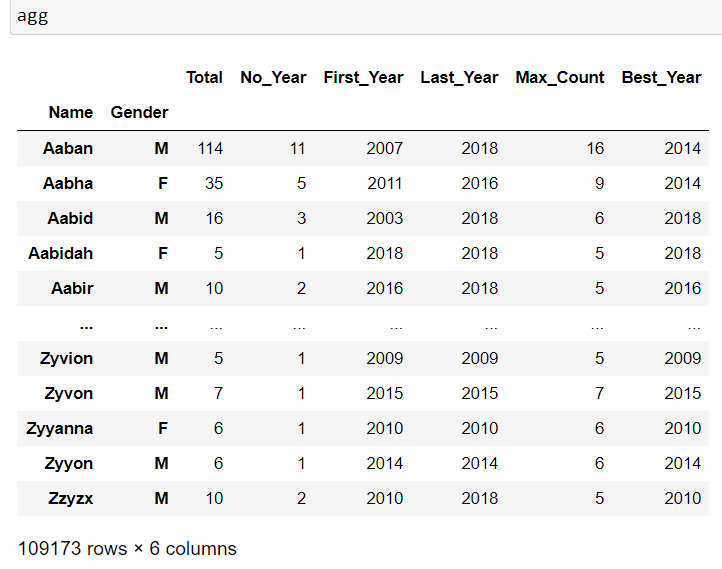

__How to interpret agg (and the first observation Aaban, M):__<br>
- There are in total 114 Male Babies with the name Aaban (Total)<br>
- The combination/entry (Aaban, M) can be found in 11 different years (No_Year)<br>
- The combination/entry (Aaban, M) appeared in the year 2007 for the first time (First_Year)<br>
- The last appearance was in the year 2018 (Last_Year)<br>
- In the most popular year, (Aaban, M) appeared 16 times (Max_Count)
- The most popular year for (Aaban, M) (Best_Year)

8. __Reset__ the Index and create a RangeIndex.

In [18]:
agg.reset_index(inplace = True)

In [19]:
agg

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count
0,Aaban,M,114,11,2007,2018,16
1,Aabha,F,35,5,2011,2016,9
2,Aabid,M,16,3,2003,2018,6
3,Aabidah,F,5,1,2018,2018,5
4,Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...,...
109168,Zyvion,M,5,1,2009,2009,5
109169,Zyvon,M,7,1,2015,2015,7
109170,Zyyanna,F,6,1,2010,2010,6
109171,Zyyon,M,6,1,2014,2014,6


9. __Filter__ agg for the combination (Mary, F)

In [20]:
mary_filter = agg[(agg.Name =='Mary')& (agg.Gender =='F')]
mary_filter

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count
68679,Mary,F,4125675,139,1880,2018,73985


## Most Popular Names of all Times

10. __Find__ the __10 most popular__ Male and Female Names of all Times (most popular in terms of total count). See Screenshot with final result below.

In [21]:
ten_pop_names = agg.groupby('Gender').apply(lambda x: x.nlargest(10, 'Total'))

In [22]:
ten_pop_names

Name Gender    Total  No_Year  First_Year  Last_Year  \
Gender                                                                     
F      68679        Mary      F  4125675      139        1880       2018   
       30706   Elizabeth      F  1638349      139        1880       2018   
       79184    Patricia      F  1572016      135        1884       2018   
       46567    Jennifer      F  1467207      101        1916       2018   
       62973       Linda      F  1452668      139        1880       2018   
       11699     Barbara      F  1434397      139        1880       2018   
       67371    Margaret      F  1248985      139        1880       2018   
       94540       Susan      F  1121703      139        1880       2018   
       28575     Dorothy      F  1107635      139        1880       2018   
       87546       Sarah      F  1077746      139        1880       2018   
M      43582       James      M  5164280      139        1880       2018   
       48388        John      M  5124817      139        1880       2018   
       84427      Robert      M  4820129      139        1880       2018   
       71023     Michael      M  4362731      139        1880       2018   
       104615    William      M  4117369      139        1880       2018   
       24204       David      M  3621322      139        1880       2018   
       49192      Joseph      M  2613304      139        1880       2018   
       83864     Richard      M  2565301      139        1880       2018   
       18299     Charles      M  2392779      139        1880       2018   
       98544      Thomas      M  2311849      139        1880       2018   

               Max_Count  
Gender                    
F      68679       73985  
       30706       20744  
       79184       56442  
       46567       63603  
       62973       99689  
       11699       48792  
       67371       28467  
       94540       47402  
       28575       39999  
       87546       28484  
M      43582       94757  
       48388       88319  
       84427       91640  
       71023       92704  
       104615      66989  
       24204       86253  
       49192       32732  
       83864       58868  
       18299       40770  
       98544       48652

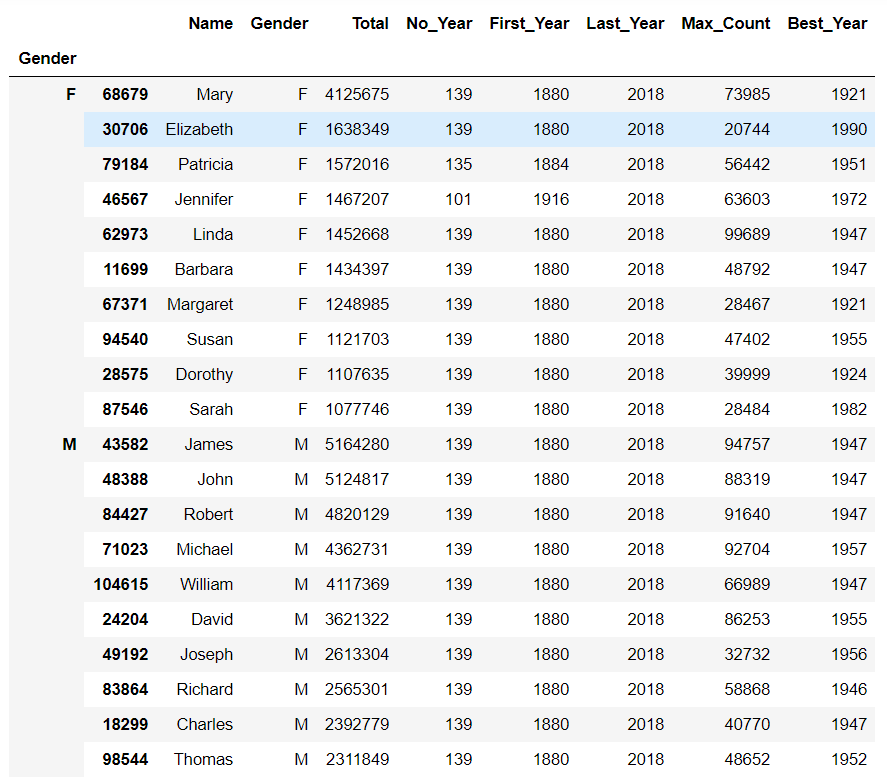

## General Trends over time (1880 - 2018)

11. __Count__ the total number of __registered Babies per Year__ and visualize. __Create__ the following Plot:

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [24]:
babies_per_year = df.groupby('Year').Count.sum()

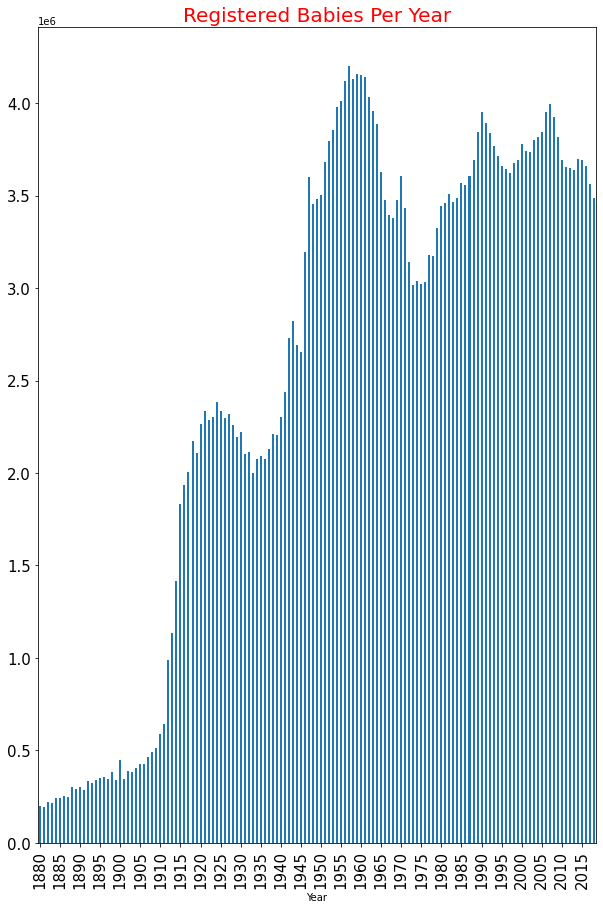

In [25]:
babies_per_year.plot(kind = 'bar', y = 'Count', figsize = (10,15), fontsize = 15)
plt.xticks(ticks = (range(0, len(babies_per_year), 5)), labels = range(1880, 2019, 5))
plt.title('Registered Babies Per Year', fontsize = 20, color='red')
plt.show()

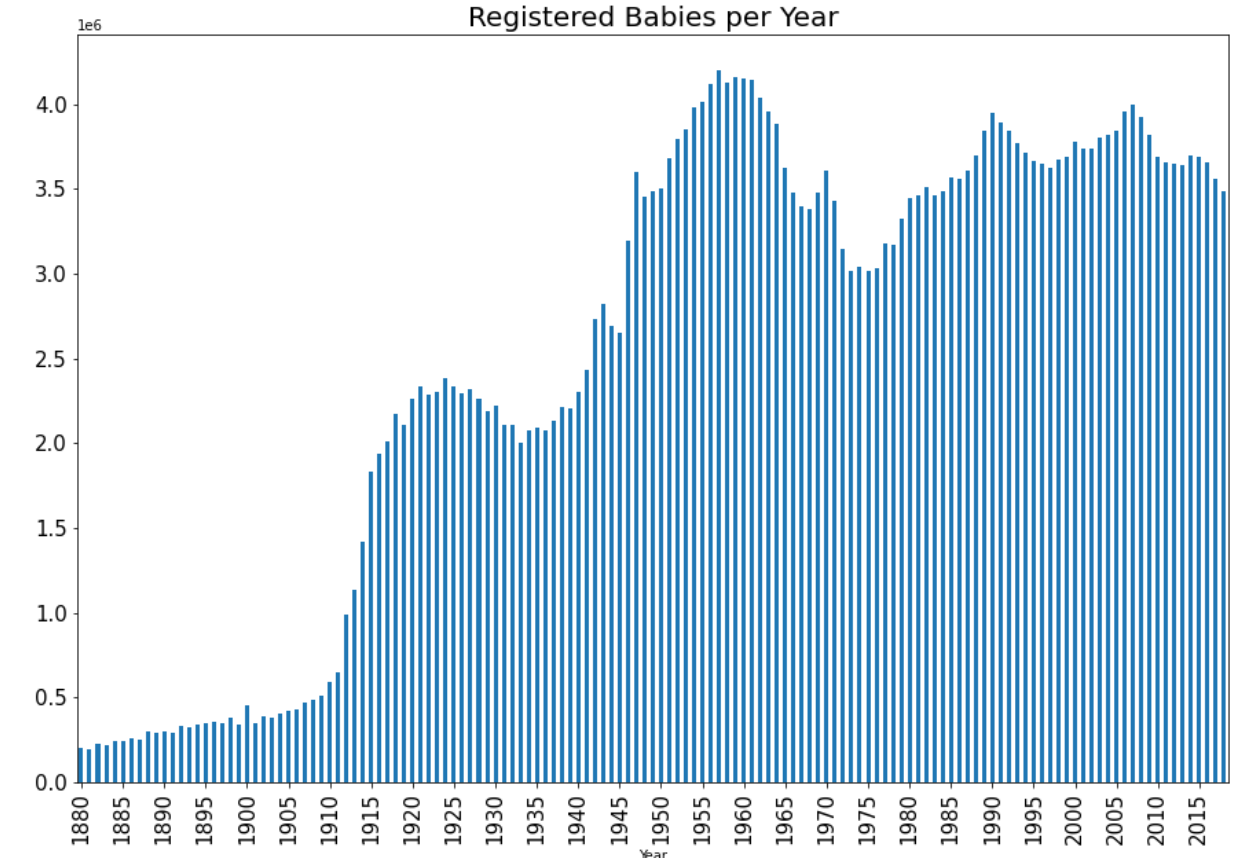

12. __Count__ the total number of __Unique Names per Year__ and visualize. __Create__ the following Plot:

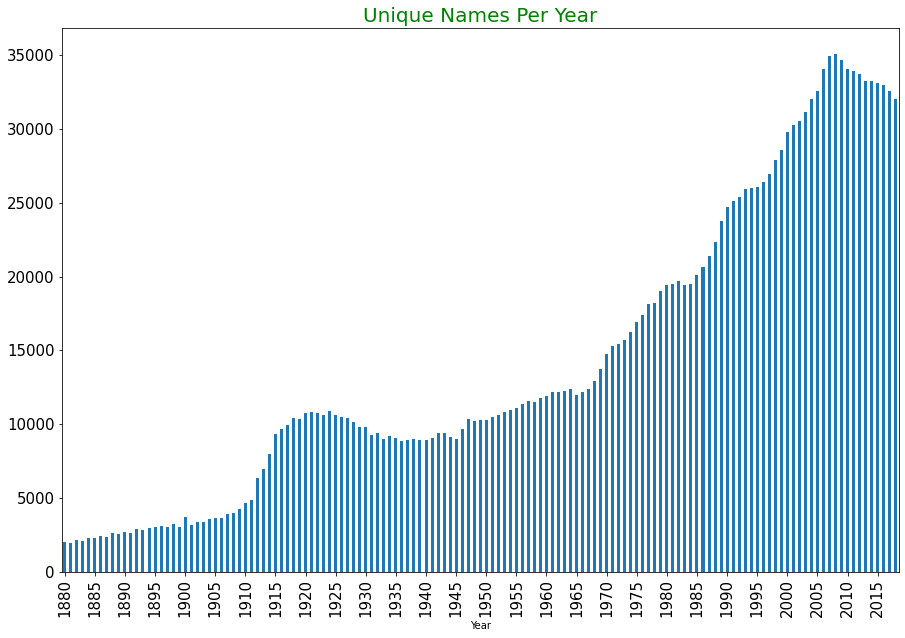

In [26]:
df_name = df.groupby('Year').Name.count()

df_name.plot(kind = 'bar', y = 'Count', figsize = (15,10), fontsize = 15)
plt.xticks(ticks = (range(0, len(df_name),5)), labels = range(1880, 2019, 5))
plt.title('Unique Names Per Year', fontsize = 20, color='green')
plt.show()

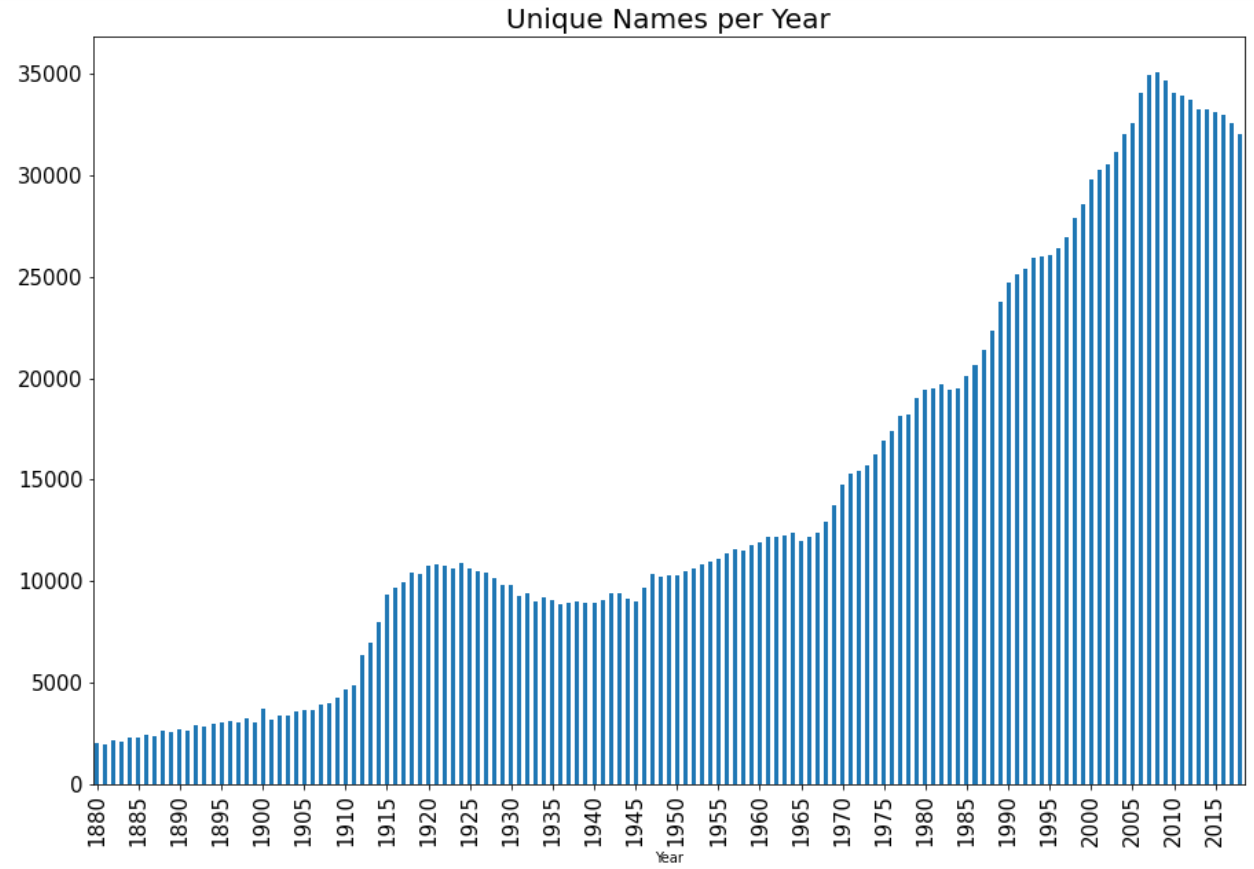

## Creating the Features "Popularity" and "Rank"

13. __Add__ the column __"Popularity"__ to df: <br> 

In [27]:
df['Popularity']= df.Count.div(df.groupby(['Year', 'Gender']).Count.transform('sum'))*1_000_000

In [28]:
df.head(3)

,Year,Name,Gender,Count,Popularity
0,1880,Mary,F,7065,77642.48
1,1880,Anna,F,2604,28617.27
2,1880,Emma,F,2003,22012.44


- Popularity in __babies per million__ (example: assume 2,000,000 registered Girl Names in 1950, thereof 100,000 Maries -> Popularity Score in 1950 for (Mary, F) is 100,000 / 2,000,000 * 1,000,000 = 50,000 per million.)  

14. __Add__ the column __"Rank"__ to df: <br> 

- Rank (example: assume Mary is the most popular Girl Name in 1950 -> Rank 1 for (Mary, F) in 1950.

In [29]:
df['Rank']= df.groupby(['Year', 'Gender']).Count.apply(lambda x: x.rank(ascending =False))

After adding "Popularity" and "Rank", df should look as follows:

In [30]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642.48,1.00
1,1880,Anna,F,2604,28617.27,2.00
2,1880,Emma,F,2003,22012.44,3.00
3,1880,Elizabeth,F,1939,21309.10,4.00
4,1880,Minnie,F,1746,19188.08,5.00
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,2.78,13042.00
1957042,2018,Zyran,M,5,2.78,13042.00
1957043,2018,Zyrie,M,5,2.78,13042.00
1957044,2018,Zyron,M,5,2.78,13042.00


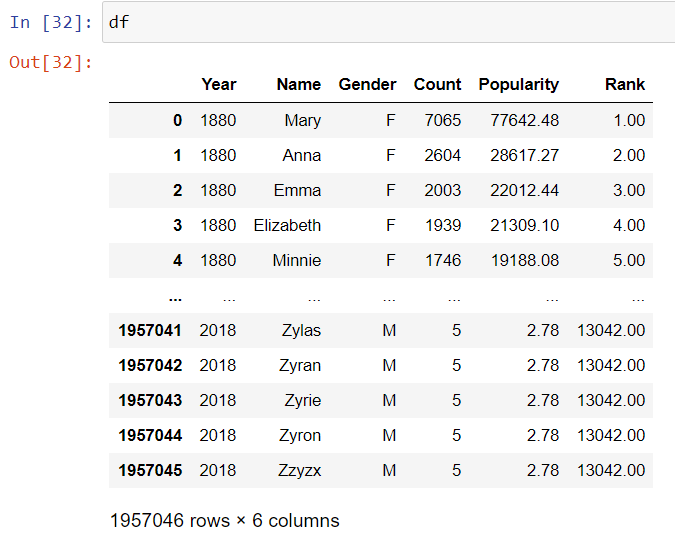

## Visualizing Name Trends over Time

15. __Visualize__ Popularity and Rank over time (see example below).

<h1 style="color: red"> Fig size was causing the graph not to display, I removed it

In [31]:
def plot_name(name, gender, crit = 'Popularity'):
    data = df.loc[(df.Name==name) & (df.Gender==gender), ['Name', 'Gender', 'Year','Rank', crit]]
    data = data.set_index('Year')
    fig, ax1 = plt.subplots() 
    ax1.bar(x=data.index, height = data[crit], label = crit)
    ax2 = ax1.twinx()
    ax2.plot(data.index, data.Rank, color = 'red', label = 'Rank')
    ax1.set_xlabel('Year', fontsize = 15)
    ax1.set_ylabel(crit, fontsize = 15)
    ax2.set_ylabel('Rank', fontsize = 15)
    ax1.set_title(name, fontsize = 18)
    ax1.tick_params(labelsize = 12)
    ax2.tick_params(labelsize = 12)
    ax1.legend(loc=2, fontsize = 12)
    ax2.legend(loc=1, fontsize = 12)
    plt.show()

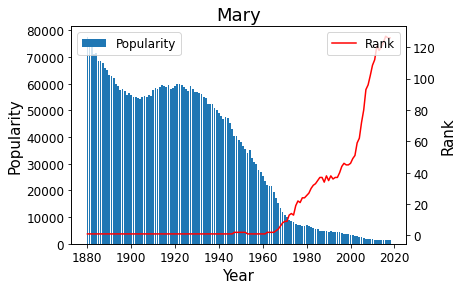

In [32]:
plot_name('Mary', 'F')

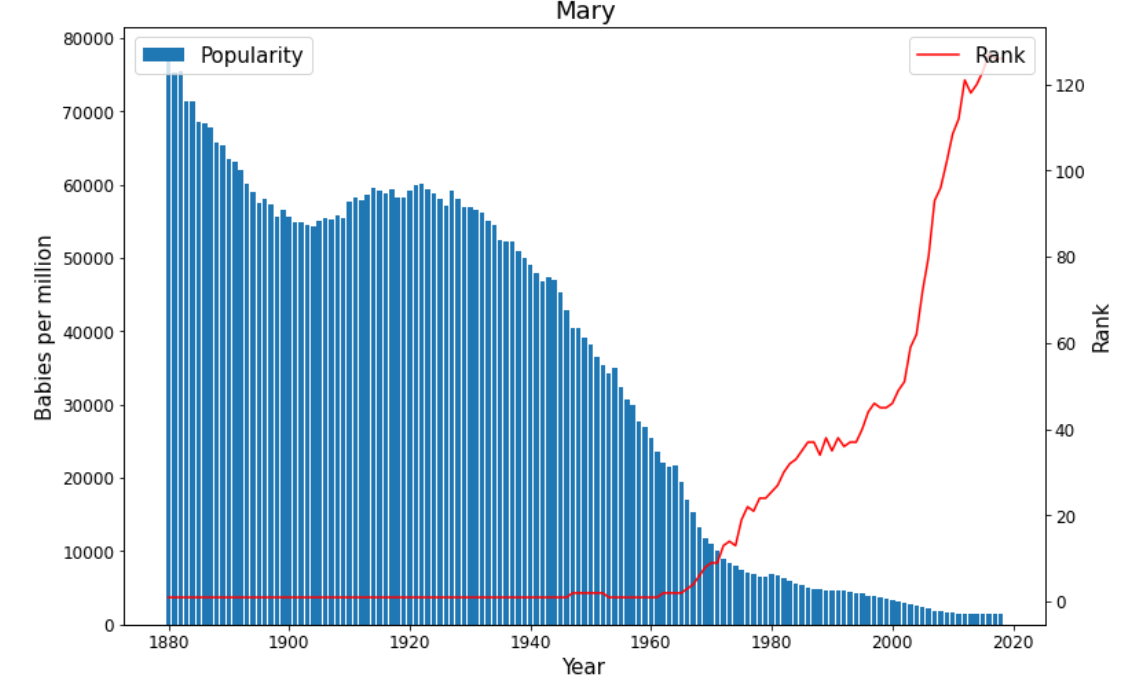

16. __Create__ this plot for all __Evergreen Names__ (see Questions 5. and 6.) (a reusable user-defined function might help)

<h1> Male Evergreen Names

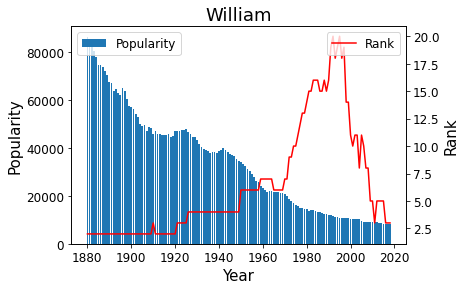

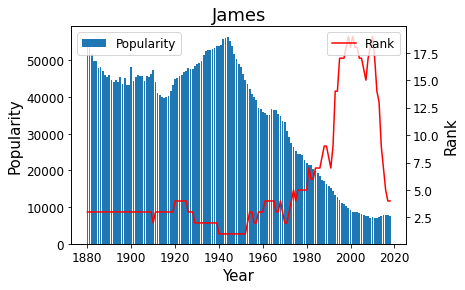

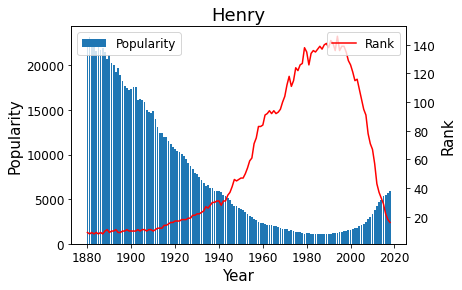

In [33]:
for name in m_evergreen.Name:
    plot_name(name, 'M', crit = 'Popularity')

<h1> Female Evergreen Names

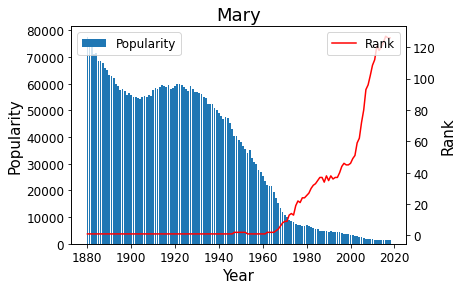

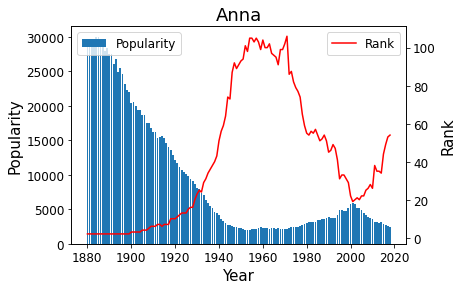

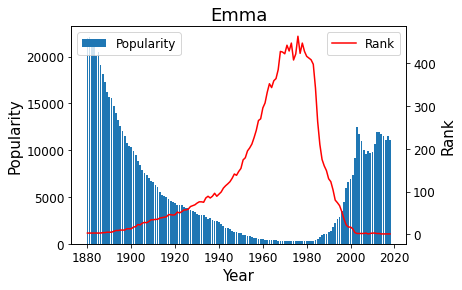

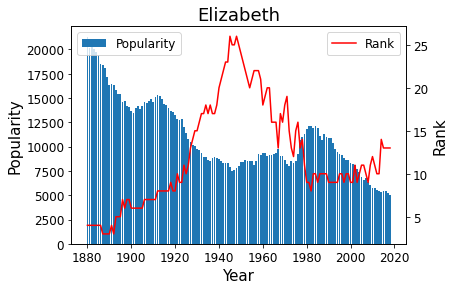

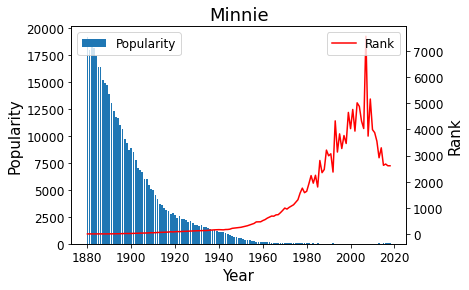

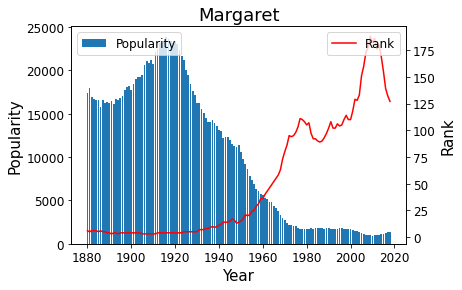

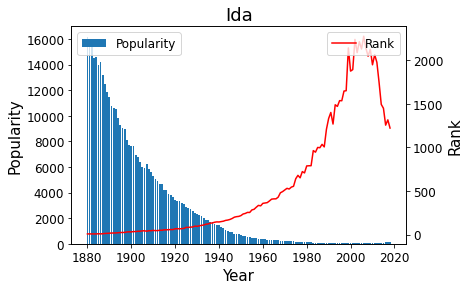

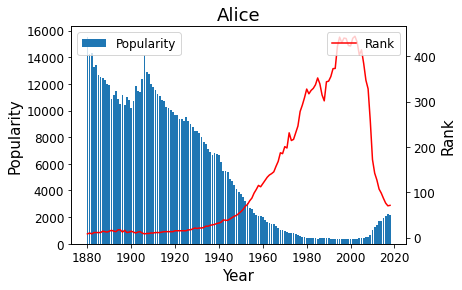

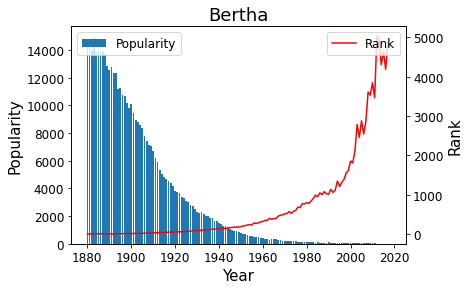

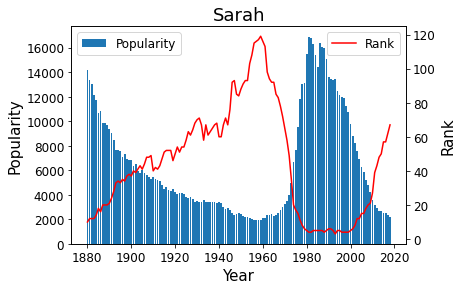

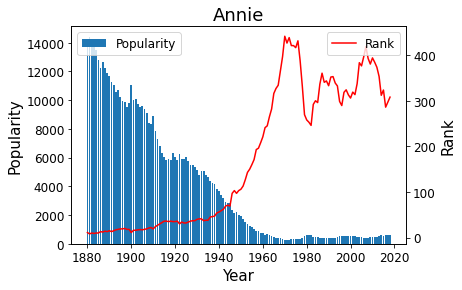

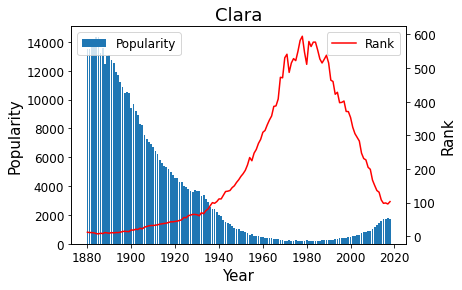

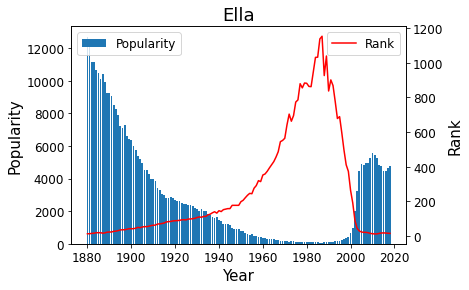

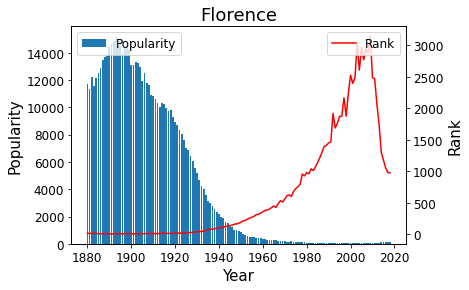

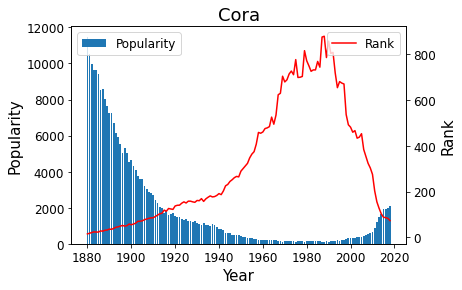

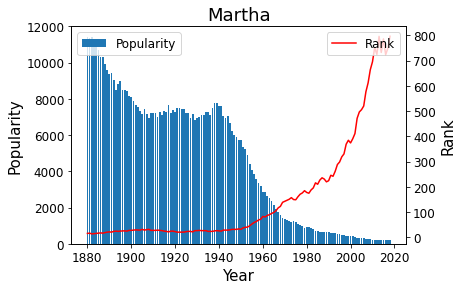

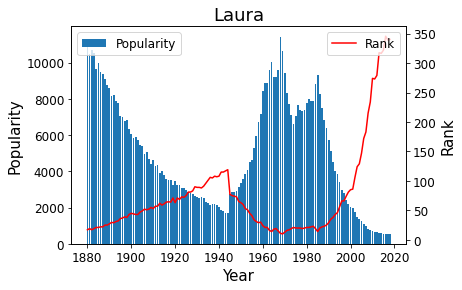

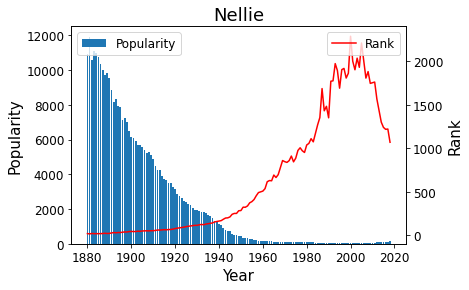

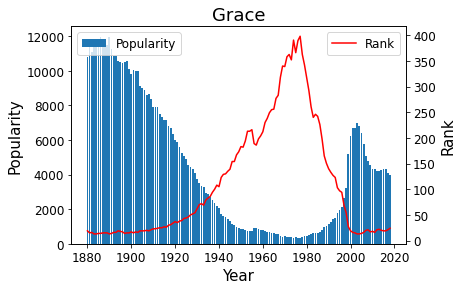

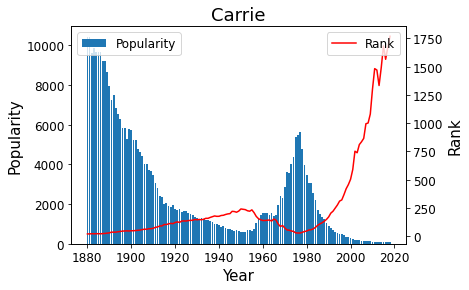

In [34]:
for name in f_evergreen.Name:
    plot_name(name, 'F', crit = 'Popularity')

# Why does a Name´s Popularity suddenly change? (Part 1)

17. __Add__ the additional columns __"Pop_lag1"__ (Popularity one year ago) and __"Pop_diff"__ (change in popularity from previous year to this year) to df.  

In [35]:
df['Pop_Lag1']  = df.groupby(['Name', 'Gender']).Popularity.shift()

In [36]:
df['Pop_diff'] = df.Popularity - df.Pop_Lag1
df

,Year,Name,Gender,Count,Popularity,Rank,Pop_Lag1,Pop_diff
0,1880,Mary,F,7065,77642.48,1.00,NaN,NaN
1,1880,Anna,F,2604,28617.27,2.00,NaN,NaN
2,1880,Emma,F,2003,22012.44,3.00,NaN,NaN
3,1880,Elizabeth,F,1939,21309.10,4.00,NaN,NaN
4,1880,Minnie,F,1746,19188.08,5.00,NaN,NaN
...,...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,2.78,13042.00,3.80,-1.02
1957042,2018,Zyran,M,5,2.78,13042.00,3.14,-0.36
1957043,2018,Zyrie,M,5,2.78,13042.00,2.71,0.06
1957044,2018,Zyron,M,5,2.78,13042.00,8.14,-5.36


18. __Create__ df2 starting with the __year 1900__ (from 1900 till today).

In [37]:
df2  = df[df.Year >=1990].copy()

In [38]:
df2

,Year,Name,Gender,Count,Popularity,Rank,Pop_Lag1,Pop_diff
1069668,1990,Jessica,F,46475,24484.56,1.00,25977.08,-1492.52
1069669,1990,Ashley,F,45560,24002.51,2.00,25817.05,-1814.54
1069670,1990,Brittany,F,36537,19248.89,3.00,20500.00,-1251.11
1069671,1990,Amanda,F,34408,18127.27,4.00,19978.66,-1851.39
1069672,1990,Samantha,F,25867,13627.59,5.00,13449.67,177.92
...,...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,2.78,13042.00,3.80,-1.02
1957042,2018,Zyran,M,5,2.78,13042.00,3.14,-0.36
1957043,2018,Zyrie,M,5,2.78,13042.00,2.71,0.06
1957044,2018,Zyron,M,5,2.78,13042.00,8.14,-5.36


19. __Filter__ df2 and find the __20 largest values__ in "Pop_diff" (get complete rows).

In [39]:
df2.nlargest(20, 'Pop_diff')

,Year,Name,Gender,Count,Popularity,Rank,Pop_Lag1,Pop_diff
1144926,1993,Taylor,F,21267,11758.14,7.00,8108.19,3649.94
1094416,1991,Shelby,F,10218,5450.43,33.00,1852.87,3597.55
1160742,1993,Austin,M,17579,8965.52,26.00,5735.76,3229.76
1423421,2003,Emma,F,22706,12433.65,2.00,9209.49,3224.16
1186654,1994,Austin,M,23190,12006.13,17.00,8965.52,3040.61
1135131,1992,Dylan,M,15062,7543.18,28.00,4832.62,2710.56
1109891,1991,Dylan,M,9761,4832.62,46.00,2148.94,2683.68
1573875,2007,Jayden,M,15244,7350.81,18.00,4686.06,2664.76
1486661,2005,Ava,F,13605,7367.89,9.00,4710.39,2657.50
1119509,1992,Taylor,F,14948,8108.19,17.00,5469.63,2638.57


20. __Create__ the popularity/rank plot (see 15. and 16.) for the Names filtered in 19.

<h1 style = 'color: red'> CROSS CHECK THE DISPLAY IN HERE </h1>

In [40]:
#for name in df2.Name:
    #plot_name(name, 'F')

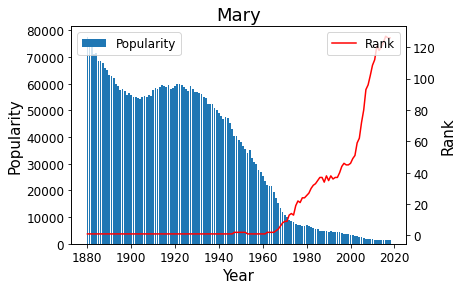

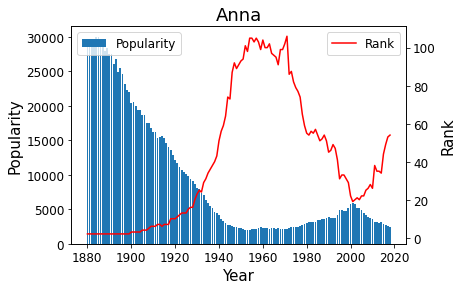

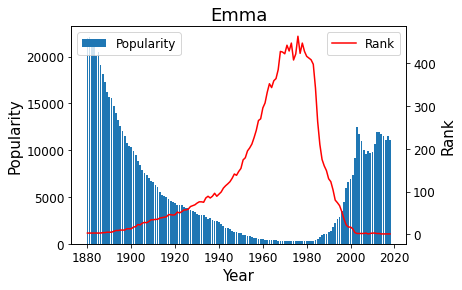

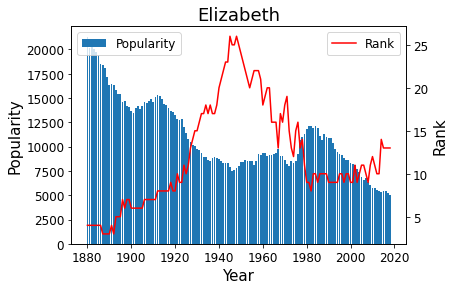

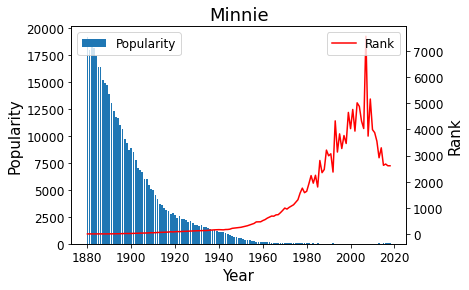

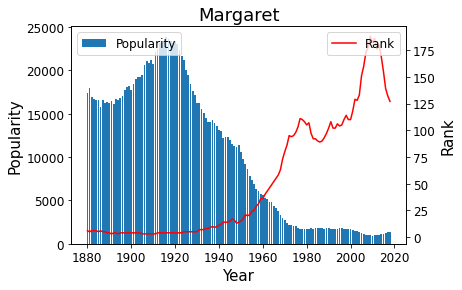

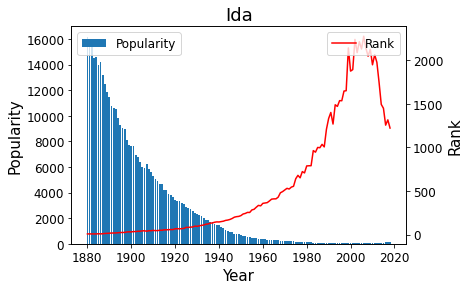

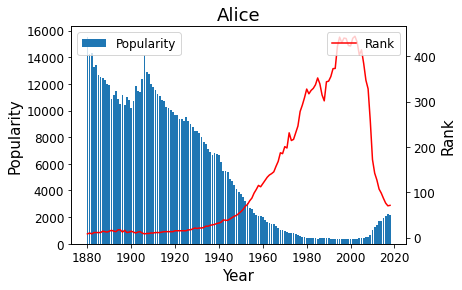

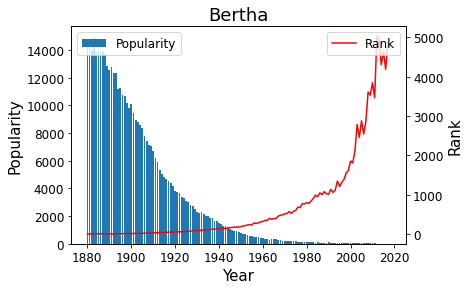

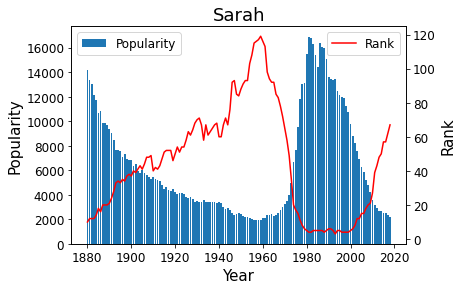

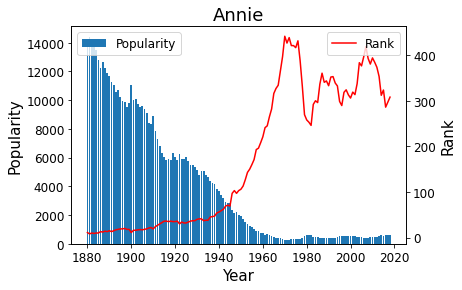

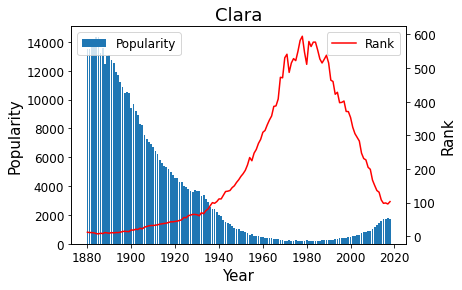

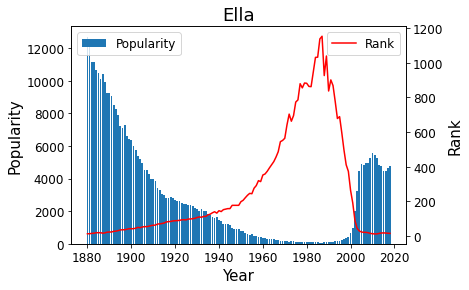

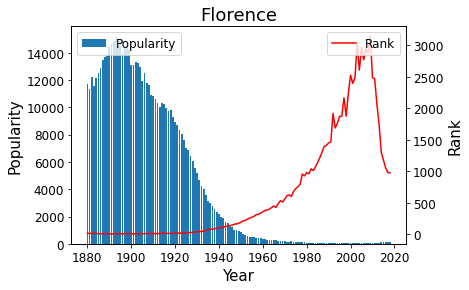

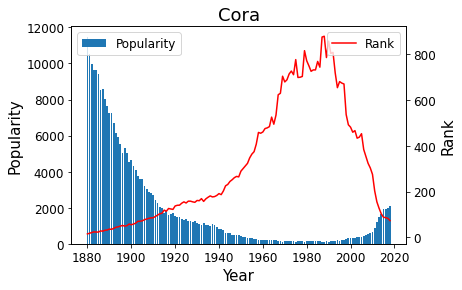

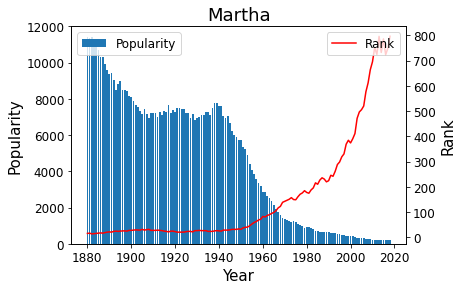

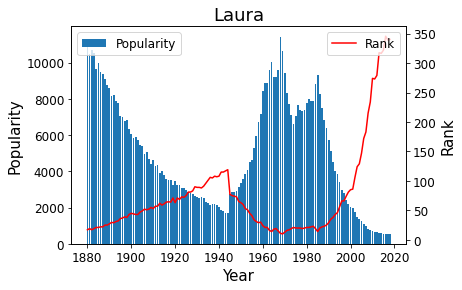

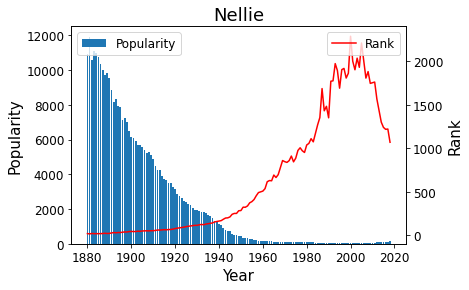

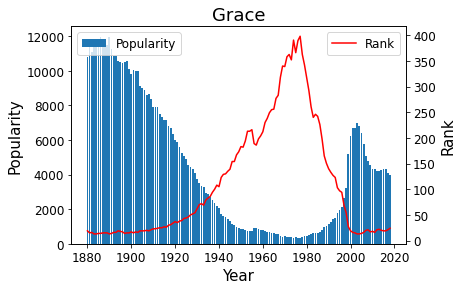

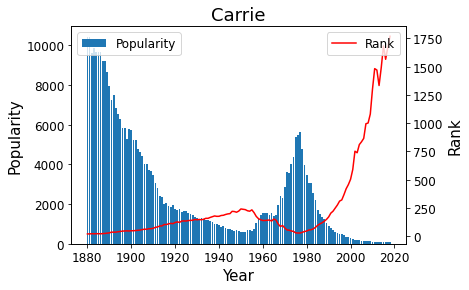

In [54]:
for item in f_evergreen.Name:
    plot_name(item, 'F')

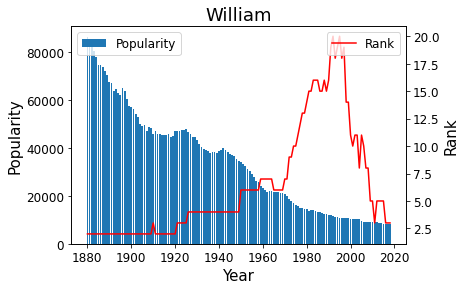

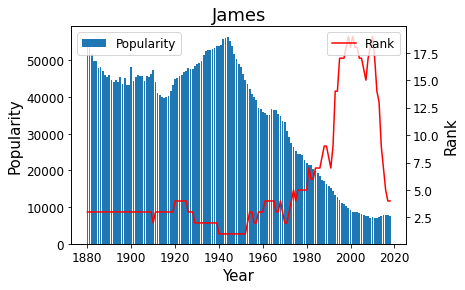

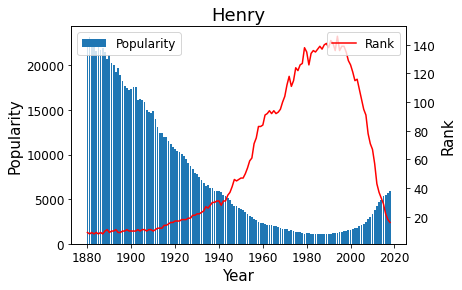

In [55]:
for item in m_evergreen.Name:
    plot_name(item, 'M')

In [ ]:
#for name in df2.Name:
    #plot_name(name, 'M')

21. __Search__ the Web for the Names __"Linda"__, __"Shirley"__ and __"Jason"__ and __find out__ why the popularity suddenly changed/spiked.

## Why does a Name´s Popularity suddenly change? (Part 2)

_No additional assignments on this. Watch the video for some more examples._

## Persistant vs. Spike-Fade Names

_No additional assignments on this. Watch the video for some more advanced examples._

## Most Popular Unisex Names

22. __Find__ the most popular __Unisex Names__ of all times. (Unisex names are names given to Boys and Girls).  

# +++++++++ See some Hints below +++++++++++++

# ++++++++++++++++ Hints++++++++++++++++++++

__Hints for 5. and 6.__<br>
Use most_pop().

__Hints for 7.__


In [ ]:
agg = df.groupby(...).agg(Total = (...), No_Year = (...), First_Year = (...), Last_Year = (...), Max_Count = (...))

Add Best_Year separately with a udf (tricky...)

__Hints for 10.__<br>
Aggregate agg further.

__Hints for 12.__<br>
Treat Instances of Unisex Names (eg. (Marie, F) and (Marie, M)) as different Names.

__Hints for 13.__<br>
Use groupby() and transform()

__Hints for 14.__<br>
Use groupby() and apply(lambda x: x.rank(ascending = False))

__Hints for 17.__<br>
shift() might help.

__Hints for 18.__<br>
difference between "Popularity" and "Pop_lag1".

__Hints for 19.__<br>
use nlargest()